In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/abughdaryan/Documents/repos/asds/ASDS-DataVisualization/project/data/netflix1.csv')
df['date_added'] = pd.to_datetime(df['date_added'])
df['normalized_title'] = df['title'].str.lower().str.strip()
df = df.drop_duplicates(subset='normalized_title')
df['country'] = df['country'].apply(lambda x: np.nan if x == 'Not Given' else x)
df['director'] = df['director'].apply(lambda x: np.nan if x == 'Not Given' else x)
df['show_id'] = df['show_id'].str.replace('s', '').astype(int)
df.set_index('show_id', inplace=True)
df.sort_index(inplace=True)
df['year'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.drop(columns=['normalized_title', 'date_added'], inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8781 entries, 1 to 8807
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8781 non-null   object
 1   title         8781 non-null   object
 2   director      6197 non-null   object
 3   country       8494 non-null   object
 4   release_year  8781 non-null   int64 
 5   rating        8781 non-null   object
 6   duration      8781 non-null   object
 7   listed_in     8781 non-null   object
 8   year          8781 non-null   int32 
 9   month_added   8781 non-null   int32 
dtypes: int32(2), int64(1), object(7)
memory usage: 686.0+ KB


In [4]:
df.dtypes

type            object
title           object
director        object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
year             int32
month_added      int32
dtype: object

In [5]:
{x: df[x].isnull().sum() for x in df}

{'type': np.int64(0),
 'title': np.int64(0),
 'director': np.int64(2584),
 'country': np.int64(287),
 'release_year': np.int64(0),
 'rating': np.int64(0),
 'duration': np.int64(0),
 'listed_in': np.int64(0),
 'year': np.int64(0),
 'month_added': np.int64(0)}

In [6]:
{x: df[x].duplicated().sum() for x in df}

{'type': np.int64(8779),
 'title': np.int64(0),
 'director': np.int64(4253),
 'country': np.int64(8695),
 'release_year': np.int64(8707),
 'rating': np.int64(8767),
 'duration': np.int64(8561),
 'listed_in': np.int64(8268),
 'year': np.int64(8767),
 'month_added': np.int64(8769)}

In [7]:
content_type = df['type'].unique().tolist()
count = df['type'].value_counts()

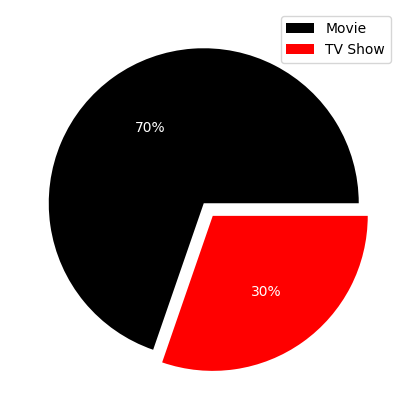

In [8]:
plt.figure(figsize=(5, 8))
plt.pie(
    count,
    labels=content_type,
    autopct="%.0f%%",
    explode=[0, 0.1],
    colors=["black", "red"],
    textprops={"color": "white"},
)
plt.legend()
plt.show()

In [9]:
df.head()

,type,title,director,country,release_year,rating,duration,listed_in,year,month_added
show_id,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,2021,9
2,TV Show,Blood & Water,NaN,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9
3,TV Show,Ganglands,Julien Leclercq,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
4,TV Show,Jailbirds New Orleans,NaN,Pakistan,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,9
5,TV Show,Kota Factory,NaN,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,9


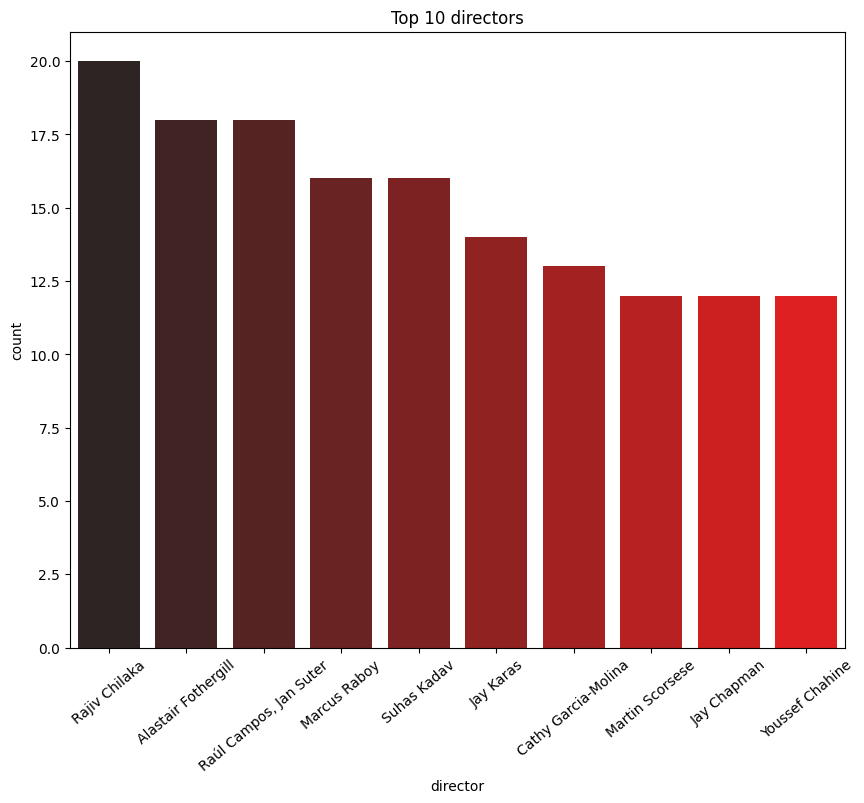

In [10]:
top_10_directors = df.director.value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 8))

plt.title('Top 10 directors')
sns.barplot(x='director', y='count', data=top_10_directors, color='red', palette='dark:red', hue='director',)
plt.xticks(rotation=40)
plt.show()

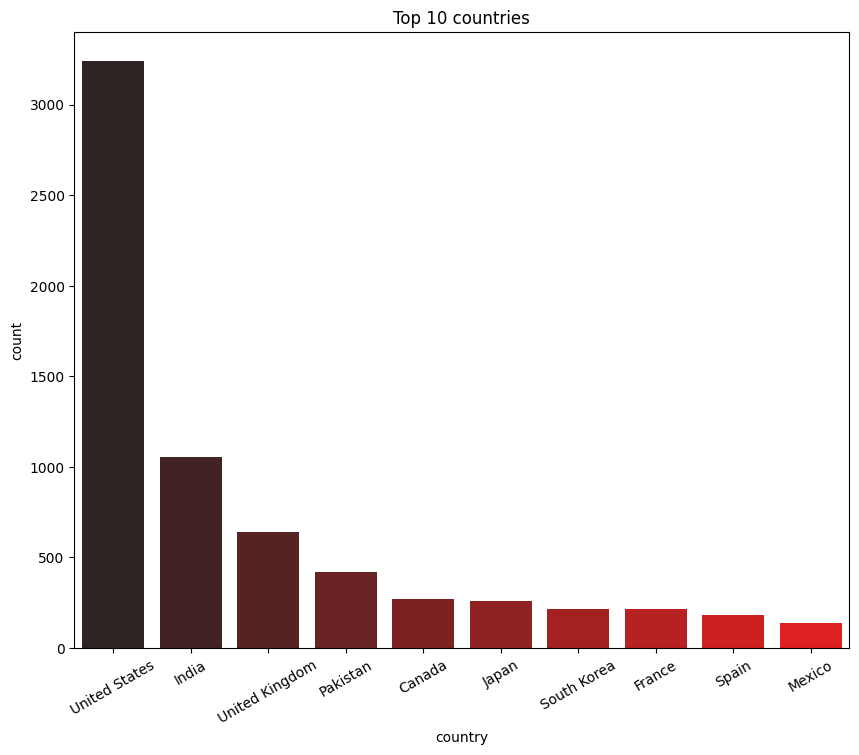

In [11]:
top_10_country = df.country.value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 8))

plt.title('Top 10 countries')
sns.barplot(x='country', y='count', data=top_10_country, color='red', palette='dark:red', hue='country',)
plt.xticks(rotation=30)
plt.show()

In [12]:
df = df.sort_values(by='release_year')
df

,type,title,director,country,release_year,rating,duration,listed_in,year,month_added
show_id,,,,,,,,,,
4251,TV Show,Pioneers: First Women Filmmakers*,NaN,Pakistan,1925,TV-14,1 Season,TV Shows,2018,12
7791,Movie,Prelude to War,Frank Capra,United States,1942,TV-14,52 min,"Classic Movies, Documentaries",2017,3
8206,Movie,The Battle of Midway,John Ford,United States,1942,TV-14,18 min,"Classic Movies, Documentaries",2017,3
8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",United States,1943,TV-PG,82 min,Documentaries,2017,3
8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,United States,1943,TV-PG,61 min,"Classic Movies, Documentaries",2017,3
...,...,...,...,...,...,...,...,...,...,...
766,Movie,Xtreme,Daniel Benmayor,Spain,2021,TV-MA,112 min,"Action & Adventure, International Movies",2021,6
765,Movie,Trippin' with the Kandasamys,Jayan Moodley,South Africa,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies",2021,6
764,TV Show,Sweet Tooth,NaN,United States,2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",2021,6


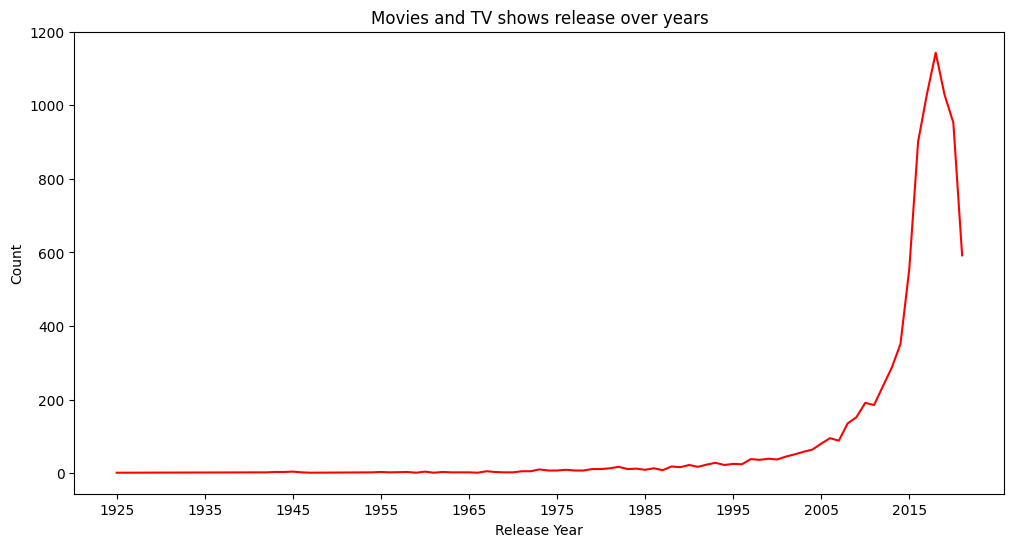

In [13]:
released_year = df.release_year.value_counts().sort_index()
release_year_list = df.release_year.tolist()
min_year = min(release_year_list)
max_year = max(release_year_list)

plt.figure(figsize=(12, 6))
sns.lineplot(x=released_year.index, y=released_year.values, color='red')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(ticks= range(min_year, max_year, 10))
plt.title('Movies and TV shows release over years')
plt.show()


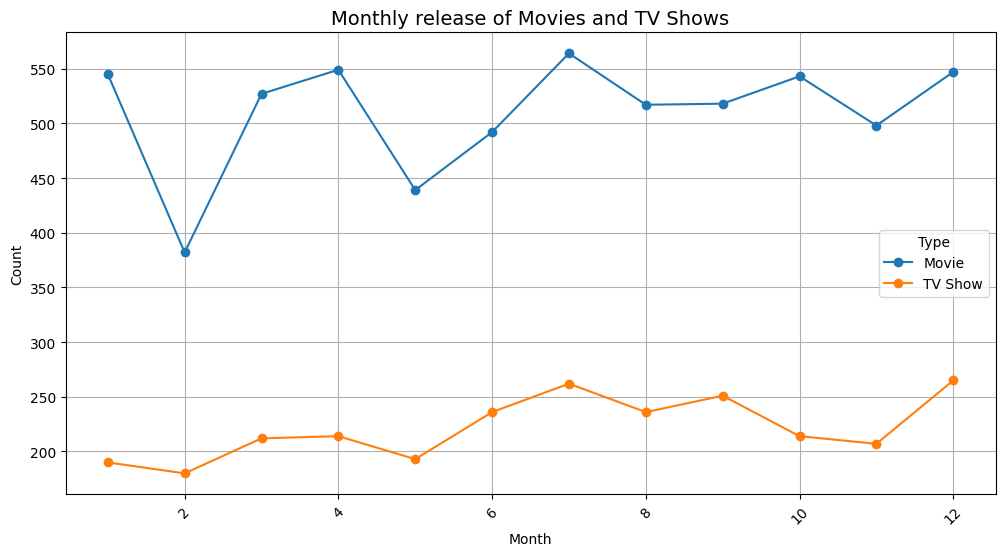

In [14]:
plt.figure(figsize=(12, 6))
df.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

/var/folders/px/bf2tz3gn0sjd3g4js54j6gd80000gn/T/ipykernel_62402/2133050457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)


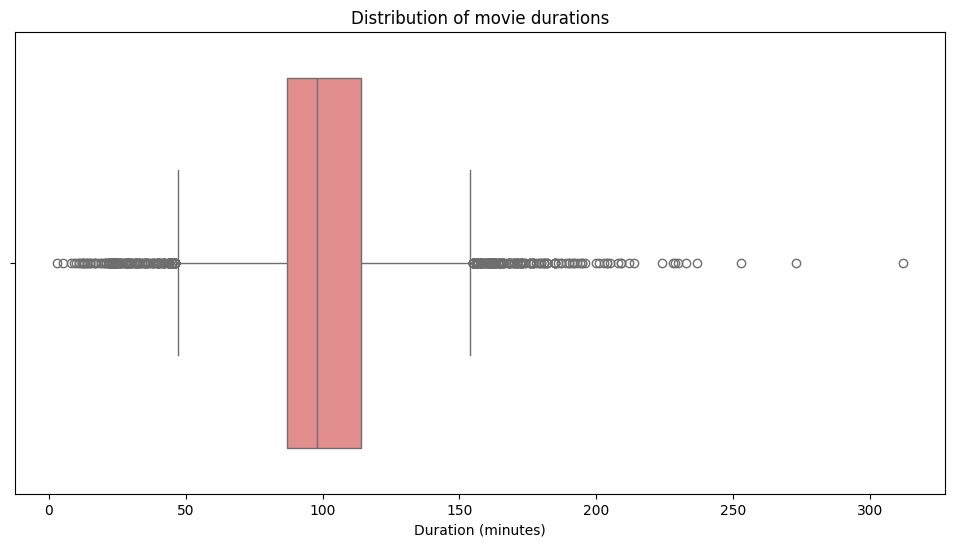

In [15]:
movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x=movies_df['duration'], color='lightcoral')
plt.title('Distribution of movie durations')
plt.xlabel('Duration (minutes)')
plt.show()

count    2660.000000
mean        1.752256
std         1.551393
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64


/var/folders/px/bf2tz3gn0sjd3g4js54j6gd80000gn/T/ipykernel_62402/2661179882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_df['duration'] = tv_show_df['duration'].apply(lambda x: int(x.split()[0]))


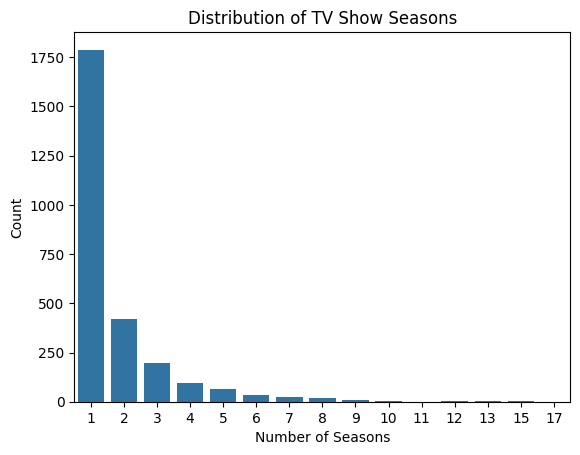

In [16]:
tv_show_df = df[df['type'] == 'TV Show']
tv_show_df['duration'] = tv_show_df['duration'].apply(lambda x: int(x.split()[0]))
print(tv_show_df.duration.describe())
sns.countplot(x='duration', data=tv_show_df)
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.title("Distribution of TV Show Seasons")
plt.show()